# K-Means Clusterings:
K-means is unsupervised clustering algorithm. It means that clusters are formed using the centeroids 'K' selected.

## Data  Preprocessing:

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
df=pd.read_csv('/content/drive/My Drive/FatimaQurban_ML&DL_BytewiseFellowship2024/FatimaQurban_ML&DL_BWF_Task6/penguins.csv')
df.head(20)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE
5,38.9,17.8,181.0,3625.0,FEMALE
6,39.2,19.6,195.0,4675.0,MALE
7,41.1,17.6,182.0,3200.0,FEMALE
8,38.6,21.2,191.0,3800.0,MALE
9,36.6,17.8,185.0,3700.0,FEMALE


In [141]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [142]:
clustering=df.iloc[:, :].values

X=df.iloc[:, :-1].values
X2=df.iloc[:, -1].values


In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Update the dataframe with the scaled features
df.iloc[:, :-1] = X_scaled

# Initialize the labelencoder
labelenc=LabelEncoder()

# Fit and transform the features
X_encoded = labelenc.fit_transform(X2)

# Update the dataframe with the scaled features
df.iloc[:, -1] = X_encoded

In [144]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,1
1,-0.830434,0.126187,-1.068577,-0.504847,0
2,-0.683490,0.432728,-0.426399,-1.187953,0
3,-1.344738,1.096901,-0.569105,-0.939551,0
4,-0.867170,1.761074,-0.783164,-0.691149,1


In [145]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test= train_test_split(clustering, y, test_size=0.2, random_state=42)

In [146]:
from sklearn.cluster import KMeans

Elbow is method is the method after which even if the k is changed. the graph between the k and wcss is become constant. so basically it gives us the best K

**WCSS=summition(distance between the points to the nearest centroid)2**

KMeans++ randomly assign the centeroid to far point to avoid **Random initialization trap.**


In [147]:
# elbow method to select the perfect K value

wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++") #n_clusters and init bother are hyperparameters .
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Wcss shows how increse in the value till k=11. we are now manually plotting it to see where the graph is staring to become constant.

In [148]:
wcss

[215298648.9538554,
 56747656.62145568,
 28334189.446677502,
 15861234.642852537,
 10759562.116134375,
 8259884.59611986,
 5801385.235849128,
 4648162.523975954,
 3542387.4362957594,
 2872156.5684211263]

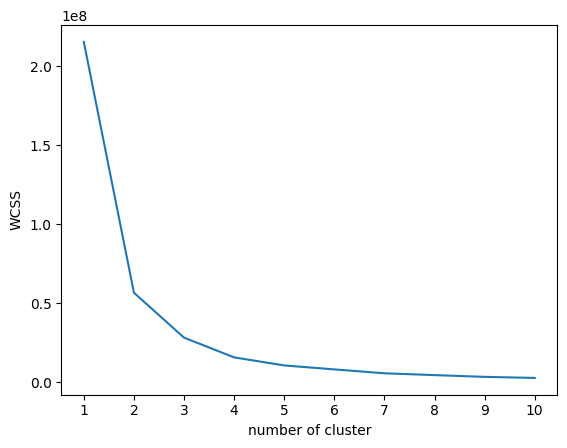

In [149]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

Above graph shows that after k=3 our line start bwcoming constant

In [150]:
kmeans = KMeans(n_clusters=4,init="k-means++", random_state=42).fit(df)
df['label'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


when we have multiple feature we use PCA to reduce its dimentionality to plot them on the graph

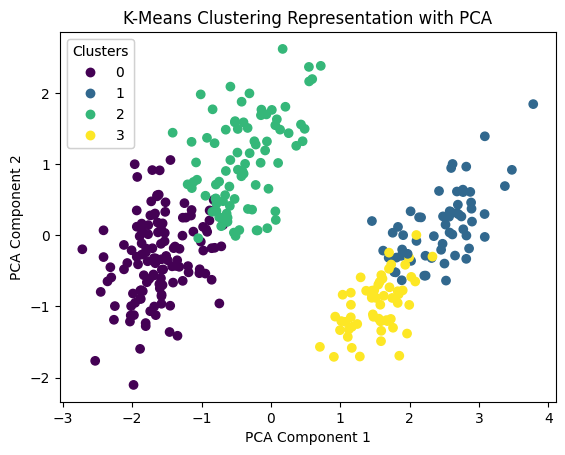

In [151]:
from sklearn.decomposition import PCA

# Reduce dimensionality with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['label'], marker='o')
plt.title('K-Means Clustering Representation with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Adding legend for clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

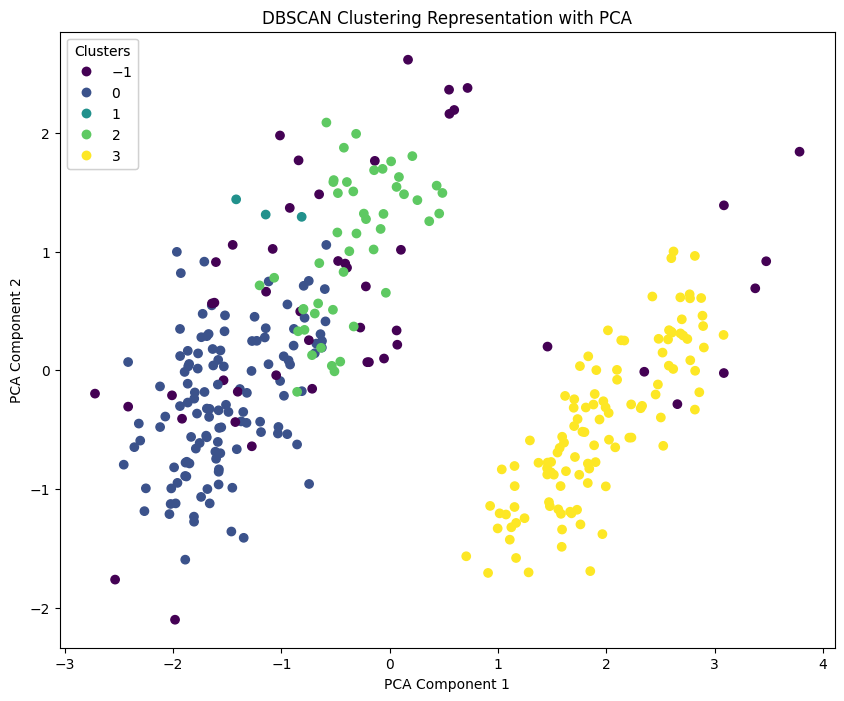

In [155]:
from sklearn.cluster import DBSCAN


# Perform DBSCAN clustering
dbscan = DBSCAN( min_samples=3)
df['label'] = dbscan.fit_predict(X_scaled)

# Reduce dimensionality with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['label'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering Representation with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Adding legend for clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()